In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from google.colab import drive
# drive.mount("/content/drive")

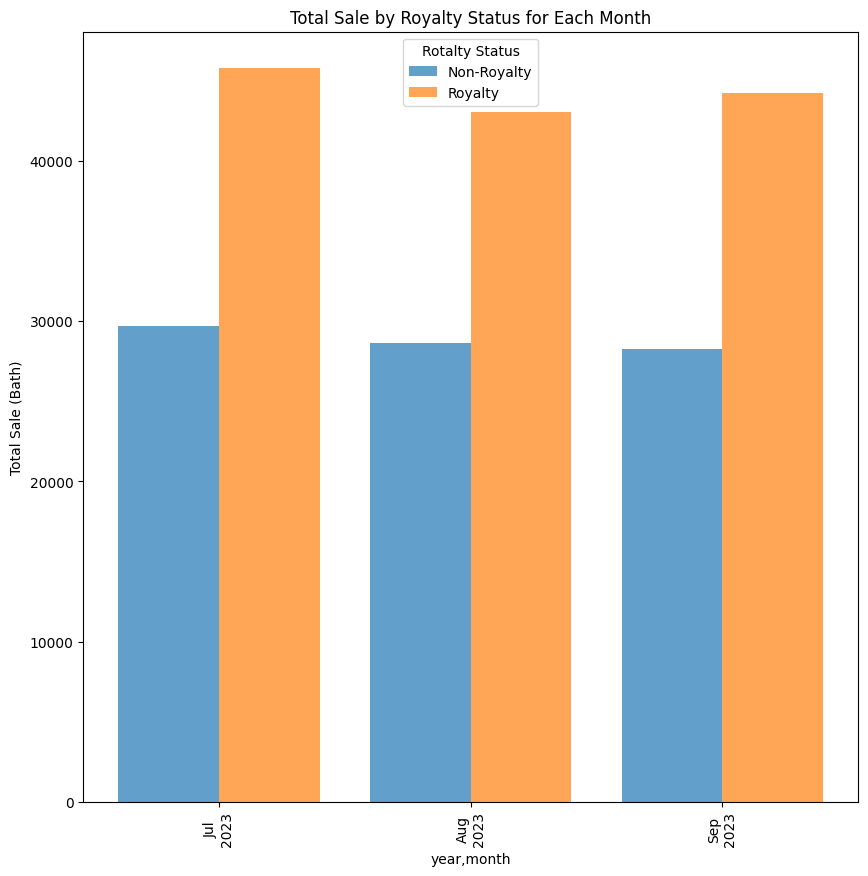

In [8]:
# ---
# Group No. 1
# 1. นาย พศิน บุญชู 6410450532
# 2. นาย ณัฐภัทร ภารกุล 6410451644
# 3. นาย นิธิภัทร เบญจม์ภัทร 6410451725
# ---

group = 1 # กลุ่มที่ 1
problem = 6 # ปัญหาที่
data_num = 5 # ชุดข้อมูลที่

# ชุดข้อมูลเก็บใน /in
in_path = "./dataset/P"+str(problem)+"/in/"
data_path = in_path+"p"+str(problem)+"_input_dataset_"+str(data_num)+".csv"

# ผลลัพธ์เก็บใน /out
out_path = "./dataset/P"+str(problem)+"/out/"
result_path = out_path+"p"+str(problem)+"_group"+str(group)+"-output"+str(data_num)+".csv"
png_path = out_path+"p"+str(problem)+"_group"+str(group)+"-plot"+str(data_num)+".png"

# อ่านข้อมูล
data = pd.read_csv(data_path)

# --- เริ่มเขียนโค้ดตรงนี้ ---
# แปลงข้อมูล ใน columns [data] เป็นวันที่
data['date'] = pd.to_datetime(data['date'])
# เพิ่ม columns [Year] โดยใช้ ปี จาก columns [data]
data['Year'] = data['date'].dt.year
# เพิ่ม columns [Month] โดยใช้ เดือน จาก columns [data]
data['Month'] = data['date'].dt.month

# แก้ไขข้อมูลใน cloumns [royalty_number]
data["royalty_number"].replace(to_replace=" ", value="False", inplace=True) #ถ้าเป็นข้อความเปล่า ใส่ Flase
data["royalty_number"] = data["royalty_number"].apply(lambda x: "True" if str.isdigit(x) else x) #ถ้าเป็นตัวเลข ใส่ True

# ทำตารางให้เหลือแค่ columns [Year] [Month] [royalty_number] [total_sale]
data = data.loc[:, ["Year", "Month","royalty_number","total_sale"]]
# รวมกลุ่ม ที่เหมือนกัน
data = data.groupby(["Year", "Month","royalty_number"])["total_sale"].sum().to_frame().reset_index()

# สร้างกราฟ

#กำหนดช่วงของ x โดยแบ่งเป็น x1 และ x2 เพื่อส้รางกราฟคู่
data_x = data['Month'].tolist() # แปลงข้อมูล เดือน มาอยู่ใน list
data_x1 = []
data_x2 = []
for i in range(0,len(data_x)):
  if i%2 == 0:
    data_x1.append(data_x[i]) # ถ้าลำดับที่เป็นเลขคู่ เก็บใน data_x1 คือข้อมูลของ ลูกค้าที่ไม่มีสมาชิก
  else :
    data_x2.append(data_x[i]+0.4) # ถ้าลำดับที่เป็นเลขคี่ เก็บใน data_x2 คือข้อมูลของ ลูกค้าที่มีสมาชิก
                                                 # +0.4 เพื่อให้ค่าในแนวแกน X ต่างจาก data_x1 เล็กน้อยทำให้แท่งกราฟติดกัน

#กำหนดช่วงของ y โดยแบ่งเป็น y1 และ y2 เพื่อส้รางกราฟคู่
data_y = data['total_sale'].tolist() # แปลงข้อมูล total_sale มาอยู่ใน list
data_y1 = []
data_y2 = []
for i in range(0,len(data_x)):
  if i%2 == 0:
    data_y1.append(data_y[i]) # ถ้าลำดับที่เป็นเลขคู่ เก็บใน data_y1 คือข้อมูลของ ลูกค้าที่ไม่มีสมาชิก
  else :
    data_y2.append(data_y[i]) # ถ้าลำดับที่เป็นเลขคี่ เก็บใน data_y2 คือข้อมูลของ ลูกค้าที่มีสมาชิก

# กำหนดชื่อเดือน แล้วเก็บไว้ใน dict
month_map = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}

# สร้างชื่อกำกับแกน x
data_year = data["Year"].tolist() # แปลงข้อมูล ปี มาอยู่ใน list
data_yearX = []
for i in range(0,len(data_year)):
    if i % 2 == 0: #เอา ลำดับที่เป็นเลขคู่เพราะ ปี กราแท่งที่เป็นลำดับเลขคี่ ปีและเดือนจะเหมือนกันเลขคู่
        data_yearX.append(month_map[data_x1[i//2]] +"\n"+str(data_year[i])) # ชื่อในแนวแกน x จะได้เป็น " ชื่อเดือน \n ปี " จากนั้นเก็บไว้ใน list [data_yearX]

# กำหนดขนาดกราฟ
plt.figure(figsize=(10, 10))
# สร้างกราฟแท่ง
plt.bar(data_x1,data_y1, width=0.40, label='Non-Royalty',alpha=0.7) # ใช้ค่า (x,y) ของ ลูกค้าที่ไม่มีสมาชิก สร้างกราฟแท่ง
plt.bar(data_x2,data_y2, width=0.40, label='Royalty',alpha=0.7) # ใช้ค่า (x,y) ของ ลูกค้าที่มีสมาชิก สร้างกราฟแท่ง ที่กราฟไม่ทับกัน เพราะ ค่า x + 0.4

#กำหนดค่า ตามแนวแกน x โดยใช้ ข้อมูล ของ list [data_yearX]
plt.xticks([i+0.2 for i in data_x1],data_yearX,rotation=90) # i+0.2 เพราะ จะให้ ข้อความที่แสดง อยู่ระหว่างกราฟแท่ง ทั้ง2

# กำหนด ชื่อ กราฟ
plt.xlabel("year,month")
plt.ylabel("Total Sale (Bath)")
plt.title("Total Sale by Royalty Status for Each Month")
# สร้างกล่อง ข้อความ บอกว่า กราฟแท่งไหนชื่ออะไร (loc='best) คือ ทำให้กล่องข้อความอยู่ในตำแหน่งที่ดีที่สุด เท่าทีจะเป็นได้
plt.legend(loc='best',fontsize=10,title='Rotalty Status')




# --- สิ้นสุดโค้ดตรงนี้ ---

# เซฟผลลัพธ์
data.to_csv(result_path, index=False)

# แสดงผลลัพธ์
data.head()

# เซฟกราฟ
plt.savefig(png_path, dpi=100)

# แสดงผลกราฟ
plt.show()